In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
import os
import DeepFM as dfm
import Preprocess as prep
from sklearn.metrics import roc_curve,confusion_matrix,recall_score,auc,accuracy_score,recall_score,roc_auc_score
import matplotlib.pyplot as plt
import datetime
warnings.filterwarnings('ignore')
path_model='E:\\kyk-ml\\Recommendation_FactorModel+lightgbm\\'

In [2]:
train=prep.load_full_data('2021/1/24','2021/2/7')
item_pool=prep.load_item_pool('2021/1/1','2021/2/7')
test=prep.load_full_data('2021/2/8','2021/2/9')

In [53]:
train_set,test_set=prep.process_data(train,item_pool,test,batch_size=256,sampling_ratio=2)

100%|██████████| 2/2 [00:00<00:00, 10.20it/s]


In [54]:
#log_dir=path_model+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)
model=dfm.DeepFatorizationMachine(128,5000)
if os.path.exists(path_model+'DeepFM.h5'):
    print('loading model.\n')
    model.predict(test_set.take(1))
    model.load_weights(path_model+'DeepFM.h5')
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(0.01),metrics=[tf.keras.metrics.BinaryAccuracy(),dfm.roc_auc,tf.keras.metrics.Recall()])
    model.evaluate(test_set)
    #model.fit(train_set,epochs=1)
else:
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(0.01),metrics=[tf.keras.metrics.BinaryAccuracy(),dfm.roc_auc,tf.keras.metrics.Recall()])
    model.fit(train_set,epochs=20,validation_data=test_set)
    model.evaluate(test_set)
    model.summary()
    model.save_weights(path_model+'DeepFM.h5')

Epoch 1/20
729/729 [==============================] - 79s 96ms/step - loss: 0.9841 - binary_accuracy: 0.5888 - roc_auc: 0.6135 - recall_5: 0.2264 - val_loss: 0.6519 - val_binary_accuracy: 0.6238 - val_roc_auc: 0.6218 - val_recall_5: 0.3905
Epoch 2/20
729/729 [==============================] - 78s 96ms/step - loss: 0.5923 - binary_accuracy: 0.6776 - roc_auc: 0.7468 - recall_5: 0.5643 - val_loss: 0.6660 - val_binary_accuracy: 0.6239 - val_roc_auc: 0.6344 - val_recall_5: 0.4407
Epoch 3/20
729/729 [==============================] - 79s 97ms/step - loss: 0.5472 - binary_accuracy: 0.7171 - roc_auc: 0.7943 - recall_5: 0.6542 - val_loss: 0.6772 - val_binary_accuracy: 0.6286 - val_roc_auc: 0.6484 - val_recall_5: 0.4950
Epoch 4/20
729/729 [==============================] - 81s 99ms/step - loss: 0.5102 - binary_accuracy: 0.7415 - roc_auc: 0.8262 - recall_5: 0.7024 - val_loss: 0.7086 - val_binary_accuracy: 0.6227 - val_roc_auc: 0.6399 - val_recall_5: 0.4812
Epoch 5/20
729/729 [====================

In [57]:
user_field=[]
item_field=[]
sparse_field=[]
y_true=[]
for i in test_set.as_numpy_iterator():
    print(i[0]['sparse_matrix'].shape)
    '''
    user_field.append(i[0]['user_field'])
    item_field.append(i[0]['item_field'])
    sparse_field.append(i[0]['sparse_matrix'])
    y_true.append(i[1])
user_field=np.hstack(user_field)
item_field=np.hstack(item_field)
sparse_field=np.hstack(sparse_field)
y_true=np.hstack(y_true)
'''

(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(256, 7104)
(183, 7104)


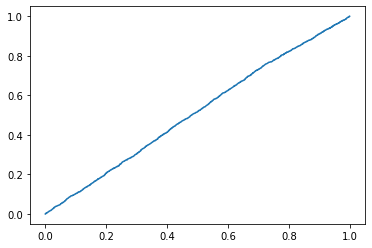

In [39]:
fpr,tpr,thresholds=roc_curve(y_true,y_pred,drop_intermediate=False)
plt.plot(fpr,tpr)
plt.show()

array([0., 0., 0., ..., 0., 0., 0.])